-------------------------------------------------------
**Zero-shot Instance Segmentation**
-------------------------------------------------------

**CVPR2021 paper**

**Implemented on google colab by zahra heydari**
-------------------------------------------------------

**IPM**

In [1]:
!nvidia-smi

Sat Jan 29 11:18:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Install Conda on Google Colab**

In [31]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.10.3-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.10.3-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local python=3.7 ujson
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
!conda update -n base -c defaults conda

--2022-01-29 11:53:07--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89026327 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>]  84.90M   252MB/s    in 0.3s    

2022-01-29 11:53:07 (252 MB/s) - ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’ saved [89026327/89026327]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py37h06a4308_0
    - cffi==1.14.6=py37h400218f_0
 

# **Clone ZSI-Segmentation from my github**

In [3]:
!git clone https://github.com/ZahraHeydari95/ZSI_Segmentation.git

Cloning into 'ZSI_Segmentation'...
remote: Enumerating objects: 575, done.
remote: Counting objects: 100% (575/575), done.
remote: Compressing objects: 100% (569/569), done.
remote: Total 575 (delta 92), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (575/575), 32.93 MiB | 5.72 MiB/s, done.
Resolving deltas: 100% (92/92), done.


**Go to ZSI_Segmentation**

In [4]:
%cd ZSI_Segmentation
!ls

/content/ZSI_Segmentation
configs  data  mmdet  README.md  requirements.txt  setup.py  tools


# **Install requirements**

In [32]:
!conda install pytorch=1.1.0 torchvision=0.3.0 cudatoolkit=10.0 -c pytorch

Solving environment: \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.0
    - pytorch=1.1.0
    - torchvision=0.3.0


The following NEW packages will be INSTALLED:

  blas               pkgs/main/linux-64::blas-1.0-mkl
  cudatoolkit        pkgs/main/linux-64::cudatoolkit-10.0.130-0
  freetype           pkgs/main/linux-64::freetype-2.11.0-h70c0345_0
  giflib             pkgs/main/linux-64::giflib-5.2.1-h7b6447c_0
  intel-openmp       pkgs/main/linux-64::intel-openmp-2021.4.0-h06a4308_3561
  jpeg               pkgs/main/linux-64::jpeg-9d-h7f8727e_0
  lcms2              pkgs/main/linux-64::lcms2-2.12-h3be6417_0
  libpng             pkgs/main/linux-64::libpng-1.6.37-hbc83047_0
  libtiff            pkgs/main/linux-64::libtiff-4.2.0-h85742a9_0
  libwebp            pkgs/main/linux-64::libwebp-1.2.0-h89dd481_0
  libwebp-base       pkgs/main/linux-64::libwebp-base-1.2.0-h27cfd23_0
  lz4-c              pkgs/main/linux

In [33]:
!pip --no-cache-dir install -r requirements.txt

In [34]:
!pip install cython 

In [35]:
!pip install ipykernel

# **Setup**

In [36]:
!python setup.py develop

/usr/local/lib/python3.7/site-packages/setuptools/dist.py:487: UserWarning: Normalizing '1.0.rc0+ee82fa1' to '1.0rc0+ee82fa1'
  warnings.warn(tmpl.format(**locals()))
running develop
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
reading manifest file 'mmdet.egg-info/SOURCES.txt'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-3.7/mmdet/ops/nms/soft_nms_cpu.cpython-37m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.7/mmdet/ops/nms/nms_cpu.cpython-37m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.7/mmdet/ops/nms/nms_cuda.cpython-37m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.7/mmdet/ops/roi_align/roi_align_cuda.cpython-37m-x86_64-linux-gnu.so -> mmdet/ops/roi_align
copying build/lib.linux-x86

**Number of cuda device**

In [37]:
import torch
torch.cuda.device_count()

1

# **Dataset - MSCOCO-2014 dataset**

In [11]:
%cd data/coco
!ls

/content/ZSI_Segmentation/data/coco
vocabulary_w2v.txt  word_w2v_withbg_48_17.txt  word_w2v_withbg_65_15.txt


**annotations dataset**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!cp /content/drive/MyDrive/annotations.zip /content/ZSI_Segmentation/data/coco

In [14]:
!unzip annotations.zip

Archive:  annotations.zip
   creating: annotations/
  inflating: annotations/instances_train2014_seen_48_17.json  
  inflating: annotations/instances_train2014_seen_65_15.json  
  inflating: annotations/instances_val2014_gzsi_48_17.json  
  inflating: annotations/instances_val2014_gzsi_65_15.json  
  inflating: annotations/instances_val2014_unseen_48_17.json  
  inflating: annotations/instances_val2014_unseen_65_15.json  


In [15]:
!rm -rf annotations.zip

**train dataset**

In [16]:
!wget http://images.cocodataset.org/zips/train2014.zip

--2022-01-29 11:27:34--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.200.145
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.200.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  34.9MB/s    in 4m 55s  

2022-01-29 11:32:30 (43.6 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]



In [17]:
!unzip train2014.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2014/COCO_train2014_000000408557.jpg  
 extracting: train2014/COCO_train2014_000000013714.jpg  
 extracting: train2014/COCO_train2014_000000194043.jpg  
 extracting: train2014/COCO_train2014_000000219859.jpg  
 extracting: train2014/COCO_train2014_000000278135.jpg  
 extracting: train2014/COCO_train2014_000000141015.jpg  
 extracting: train2014/COCO_train2014_000000280923.jpg  
 extracting: train2014/COCO_train2014_000000200024.jpg  
 extracting: train2014/COCO_train2014_000000435713.jpg  
 extracting: train2014/COCO_train2014_000000249993.jpg  
 extracting: train2014/COCO_train2014_000000424160.jpg  
 extracting: train2014/COCO_train2014_000000142761.jpg  
 extracting: train2014/COCO_train2014_000000532668.jpg  
 extracting: train2014/COCO_train2014_000000564904.jpg  
 extracting: train2014/COCO_train2014_000000346384.jpg  
 extracting: train2014/COCO_train2014_000000560934.jpg  
 extracting: train2014/COCO_train2014

In [18]:
!rm -rf train2014.zip

**validation dataset**

In [19]:
!wget http://images.cocodataset.org/zips/val2014.zip

--2022-01-29 11:34:51--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.70.220
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.70.220|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  41.9MB/s    in 2m 27s  

2022-01-29 11:37:18 (43.2 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [20]:
!unzip val2014.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2014/COCO_val2014_000000535608.jpg  
 extracting: val2014/COCO_val2014_000000279145.jpg  
 extracting: val2014/COCO_val2014_000000243495.jpg  
 extracting: val2014/COCO_val2014_000000225791.jpg  
 extracting: val2014/COCO_val2014_000000428067.jpg  
 extracting: val2014/COCO_val2014_000000059383.jpg  
 extracting: val2014/COCO_val2014_000000558498.jpg  
 extracting: val2014/COCO_val2014_000000376123.jpg  
 extracting: val2014/COCO_val2014_000000191304.jpg  
 extracting: val2014/COCO_val2014_000000171062.jpg  
 extracting: val2014/COCO_val2014_000000014549.jpg  
 extracting: val2014/COCO_val2014_000000121152.jpg  
 extracting: val2014/COCO_val2014_000000276596.jpg  
 extracting: val2014/COCO_val2014_000000029431.jpg  
 extracting: val2014/COCO_val2014_000000036349.jpg  
 extracting: val2014/COCO_val2014_000000502055.jpg  
 extracting: val2014/COCO_val2014_000000438848.jpg  
 extracting: val2014/COCO_val2014_000000364973.j

In [21]:
!rm -rf val2014.zip

In [22]:
%cd ..
%cd ..

/content/ZSI_Segmentation/data
/content/ZSI_Segmentation


In [23]:
!pwd

/content/ZSI_Segmentation


# **Training**

**48/17 split**

In [43]:
!chmod +x tools/dist_train.sh
!bash ./tools/dist_train.sh configs/zsi/48_17/train/zero-shot-mask-rcnn-BARPN-bbox_mask_sync_bg_decoder.py 1

2022-01-29 12:09:44,845 - INFO - Distributed training: True
/content/ZSI_Segmentation/mmdet/models/anchor_heads/ba_anchor_head.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.vec_bg_weight = torch.tensor(self.vec_bg_weight).cuda().view([1, self.semantic_dims])
2022-01-29 12:09:48,016 - INFO - load model from: torchvision://resnet101
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100% 178728960/178728960 [00:01<00:00, 94525063.99it/s]
2022-01-29 12:09:50,391 - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

loading annotations into memory...
Done (t=5.60s)
creating index...
index created!
2022-01-29 12:09:56,811 - INFO - Start running, host: root@b64a6ce6a35f, work_dir: /c

# **Inference & Evaluate**

In [24]:
!mkdir checkpoints

* checkpoint for 12 epoch



In [25]:
!cp /content/drive/MyDrive/ZSI_48_17.pth /content/ZSI_Segmentation/checkpoints

* checkpoint for 1 epoch - train with me

In [61]:
!cp -av /content/ZSI_Segmentation/work_dirs /content/drive/MyDrive/

'/content/ZSI_Segmentation/work_dirs' -> '/content/drive/MyDrive/work_dirs'
'/content/ZSI_Segmentation/work_dirs/zsi' -> '/content/drive/MyDrive/work_dirs/zsi'
'/content/ZSI_Segmentation/work_dirs/zsi/48_17' -> '/content/drive/MyDrive/work_dirs/zsi/48_17'
'/content/ZSI_Segmentation/work_dirs/zsi/48_17/20220129_120956.log' -> '/content/drive/MyDrive/work_dirs/zsi/48_17/20220129_120956.log'
'/content/ZSI_Segmentation/work_dirs/zsi/48_17/epoch_1.pth' -> '/content/drive/MyDrive/work_dirs/zsi/48_17/epoch_1.pth'
'/content/ZSI_Segmentation/work_dirs/zsi/48_17/latest.pth' -> '/content/drive/MyDrive/work_dirs/zsi/48_17/latest.pth'
'/content/ZSI_Segmentation/work_dirs/zsi/48_17/20220129_120956.log.json' -> '/content/drive/MyDrive/work_dirs/zsi/48_17/20220129_120956.log.json'


In [62]:
!cp /content/drive/MyDrive/work_dirs/zsi/48_17/epoch_1.pth /content/ZSI_Segmentation/checkpoints

In [63]:
!cp /content/drive/MyDrive/work_dirs/zsi/48_17/latest.pth /content/ZSI_Segmentation/checkpoints

**ZSI task for 48/17 split:**

inference:

* checkpoint for 12 epoch

In [38]:
!chmod +x tools/dist_test.sh
!bash ./tools/dist_test.sh configs/zsi/48_17/test/zsi/zero-shot-mask-rcnn-BARPN-bbox_mask_sync_bg_decoder.py /content/ZSI_Segmentation/checkpoints/ZSI_48_17.pth 1 --json_out results/zsi_48_17.json

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
/content/ZSI_Segmentation/mmdet/models/anchor_heads/ba_anchor_head.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.vec_bg_weight = torch.tensor(self.vec_bg_weight).cuda().view([1, self.semantic_dims])
The model and loaded state dict do not match exactly

missing keys in source state_dict: mask_head.conv_vec_unseen.weight, mask_head.con_vec_t.weight

terminal width is too small (0), please consider widen the terminal for better progressbar visualization
[>>>>>>>>>>] 2729/2729, 4.0 task/s, elapsed: 687s, ETA:     0s

* checkpoint for 1 epoch - train with me

In [64]:
!chmod +x tools/dist_test.sh
!bash ./tools/dist_test.sh configs/zsi/48_17/test/zsi/zero-shot-mask-rcnn-BARPN-bbox_mask_sync_bg_decoder.py /content/ZSI_Segmentation/checkpoints/epoch_1.pth 1 --json_out results/zsi_48_17_epoch1.json

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
/content/ZSI_Segmentation/mmdet/models/anchor_heads/ba_anchor_head.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.vec_bg_weight = torch.tensor(self.vec_bg_weight).cuda().view([1, self.semantic_dims])
The model and loaded state dict do not match exactly

missing keys in source state_dict: mask_head.con_vec_t.weight, mask_head.conv_vec_unseen.weight

terminal width is too small (0), please consider widen the terminal for better progressbar visualization
[>>>>>>>>>>] 2729/2729, 4.0 task/s, elapsed: 686s, ETA:     0s

evaluate:

In [27]:
!mkdir results

* checkpoint for 12 epoch

(bounding box)

In [39]:
!python tools/zsi_coco_eval.py results/zsi_48_17.bbox.json --ann data/coco/annotations/instances_val2014_unseen_48_17.json

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Loading and preparing results...
DONE (t=2.07s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=7.42s).
Accumulating evaluation results...
DONE (t=2.52s).
Average Precision  (AP) @[ IoU=0.40      | area=   all | maxDets=100 ] = 0.125
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.114
Average Precision  (AP) @[ IoU=0.60      | area=   all | maxDets=100 ] = 0.099
Average Recall     (AR) @[ IoU=0.40      | area=   all | maxDets=100 ] = 0.574
Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.539
Average Recall     (AR) @[ IoU=0.60      | area=   all | maxDets=100 ] = 0.483


(Segmentation)

In [40]:
!python tools/zsi_coco_eval.py results/zsi_48_17.segm.json --ann data/coco/annotations/instances_val2014_unseen_48_17.json --types segm

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Loading and preparing results...
DONE (t=4.40s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=11.03s).
Accumulating evaluation results...
DONE (t=2.52s).
Average Precision  (AP) @[ IoU=0.40      | area=   all | maxDets=100 ] = 0.106
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.090
Average Precision  (AP) @[ IoU=0.60      | area=   all | maxDets=100 ] = 0.072
Average Recall     (AR) @[ IoU=0.40      | area=   all | maxDets=100 ] = 0.503
Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.449
Average Recall     (AR) @[ IoU=0.60      | area=   all | maxDets=100 ] = 0.387


* checkpoint for 1 epoch - train with me

(bounding box)

In [65]:
!python tools/zsi_coco_eval.py results/zsi_48_17_epoch1.bbox.json --ann data/coco/annotations/instances_val2014_unseen_48_17.json

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Loading and preparing results...
DONE (t=2.07s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.57s).
Accumulating evaluation results...
DONE (t=1.70s).
Average Precision  (AP) @[ IoU=0.40      | area=   all | maxDets=100 ] = 0.053
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.046
Average Precision  (AP) @[ IoU=0.60      | area=   all | maxDets=100 ] = 0.038
Average Recall     (AR) @[ IoU=0.40      | area=   all | maxDets=100 ] = 0.297
Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.274
Average Recall     (AR) @[ IoU=0.60      | area=   all | maxDets=100 ] = 0.237


(Segmentation)

In [66]:
!python tools/zsi_coco_eval.py results/zsi_48_17_epoch1.segm.json --ann data/coco/annotations/instances_val2014_unseen_48_17.json --types segm

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
Loading and preparing results...
DONE (t=4.29s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=8.33s).
Accumulating evaluation results...
DONE (t=1.68s).
Average Precision  (AP) @[ IoU=0.40      | area=   all | maxDets=100 ] = 0.047
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.040
Average Precision  (AP) @[ IoU=0.60      | area=   all | maxDets=100 ] = 0.034
Average Recall     (AR) @[ IoU=0.40      | area=   all | maxDets=100 ] = 0.272
Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.247
Average Recall     (AR) @[ IoU=0.60      | area=   all | maxDets=100 ] = 0.216


**GZSI task for 48/17 split:**

inference: 

* checkpoint for 12 epoch

In [67]:
!chmod +x tools/dist_test.sh
!bash ./tools/dist_test.sh configs/zsi/48_17/test/gzsi/zero-shot-mask-rcnn-BARPN-bbox_mask_sync_bg_decoder_gzsi.py checkpoints/ZSI_48_17.pth 1 --json_out results/gzsi_48_17.json

loading annotations into memory...
Done (t=0.73s)
creating index...
index created!
/content/ZSI_Segmentation/mmdet/models/anchor_heads/ba_anchor_head.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.vec_bg_weight = torch.tensor(self.vec_bg_weight).cuda().view([1, self.semantic_dims])
The model and loaded state dict do not match exactly

missing keys in source state_dict: mask_head.conv_vec_unseen.weight, mask_head.con_vec_t.weight

terminal width is too small (0), please consider widen the terminal for better progressbar visualization
[          ] 0/6392, elapsed: 0s, ETA:Traceback (most recent call last):
  File "./tools/test.py", line 236, in <module>
    main()
  File "./tools/test.py", line 199, in main
    outputs = multi_gpu_test(model, data_loader, args.tmpdir)
  File "./tools/test.py", line 48, in multi_gpu_test
    re

evaluate: 

* checkpoint for 12 epoch

In [44]:
!python tools/gzsi_coco_eval.py results/gzsi_48_17.bbox.json --ann data/coco/annotations/instances_val2014_gzsi_48_17.json --gzsi --num-seen-classes 48

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
Loading and preparing results...
Traceback (most recent call last):
  File "tools/gzsi_coco_eval.py", line 36, in <module>
    main()
  File "tools/gzsi_coco_eval.py", line 32, in main
    coco_eval(args.result, args.types, args.ann, args.max_dets, args.classwise, args.gzsi, args.num_seen_classes)
  File "/content/ZSI_Segmentation/mmdet/core/evaluation/coco_utils.py", line 44, in coco_eval
    coco_dets = coco.loadRes(result_file)
  File "/usr/local/lib/python3.7/site-packages/pycocotools/coco.py", line 319, in loadRes
    with open(resFile) as f:
FileNotFoundError: [Errno 2] No such file or directory: 'results/gzsi_48_17.bbox.json'


In [45]:
!python tools/gzsi_coco_eval.py results/gzsi_48_17.segm.json --ann data/coco/annotations/instances_val2014_gzsi_48_17.json --gzsi --num-seen-classes 48 --types segm

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
Loading and preparing results...
Traceback (most recent call last):
  File "tools/gzsi_coco_eval.py", line 36, in <module>
    main()
  File "tools/gzsi_coco_eval.py", line 32, in main
    coco_eval(args.result, args.types, args.ann, args.max_dets, args.classwise, args.gzsi, args.num_seen_classes)
  File "/content/ZSI_Segmentation/mmdet/core/evaluation/coco_utils.py", line 44, in coco_eval
    coco_dets = coco.loadRes(result_file)
  File "/usr/local/lib/python3.7/site-packages/pycocotools/coco.py", line 319, in loadRes
    with open(resFile) as f:
FileNotFoundError: [Errno 2] No such file or directory: 'results/gzsi_48_17.segm.json'


# **Show instance Dataset**

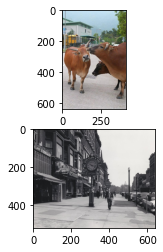

In [46]:
import matplotlib.pyplot as plt
painting1=plt.imread("data/coco/val2014/COCO_val2014_000000285235.jpg")
painting2=plt.imread("data/coco/val2014/COCO_val2014_000000071667.jpg")

plt.subplot(2,1,1);
plt.imshow(painting1);


plt.subplot(2,1,2);
plt.imshow(painting2);


In [47]:
!python tools/test.py configs/zsi/48_17/test/zsi/zero-shot-mask-rcnn-BARPN-bbox_mask_sync_bg_decoder.py ./checkpoints/ZSI_48_17.pth --show

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
/content/ZSI_Segmentation/mmdet/models/anchor_heads/ba_anchor_head.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.vec_bg_weight = torch.tensor(self.vec_bg_weight).cuda().view([1, self.semantic_dims])
The model and loaded state dict do not match exactly

missing keys in source state_dict: mask_head.conv_vec_unseen.weight, mask_head.con_vec_t.weight

terminal width is too small (0), please consider widen the terminal for better progressbar visualization
[          ] 0/2729, elapsed: 0s, ETA:[[1.1469437e+03 5.0985309e+02 1.2016266e+03 6.6883710e+02 3.0500704e-01]
 [3.2696539e+02 3.7685556e+02 3.8871307e+02 4.4864816e+02 3.0453789e-01]
 [6.1534998e+02 3.3485056e+02 6.8557434e+02 4.0496078e+02 3.0227166e-01]
 [9.7368250e+02 4.5061829e+02 1.1119794e

In [48]:
import json

In [49]:
bbox = []

with open('/content/ZSI_Segmentation/results/zsi_48_17.bbox.json') as f:
    text_bbox = f.read()
    bbox.append(json.loads(text_bbox))

In [50]:
segm = []

with open('/content/ZSI_Segmentation/results/zsi_48_17.segm.json') as f:
    text_segm = f.read()
    segm.append(json.loads(text_segm))

In [51]:
bbox[0][100]

{'bbox': [61.29452133178711,
  30.762983322143555,
  524.6133766174316,
  377.37401008605957],
 'category_id': 6,
 'image_id': 143931,
 'score': 0.330874502658844}

In [52]:
segm[0][100]

{'category_id': 6,
 'image_id': 143931,
 'score': 0.330874502658844,
 'segmentation': {'counts': 'ncl0R:n400000000000000000000O10cLVFd1j9ZNXFf1g9YN[Fg1e9VN^Fj1a9UNaFk1_9SNcFm1\\9RNfFn1Y9RNhFn1V9TNjFl1R9WNoFi1l8[NUGe1e8aN[G_1a8dN`G\\1[8iNeGW1X8lNhGT1U8nNlGR1R8POnGP1P8ROPHn0m7TOTHl0j7VOVHj0j7VOVHj0i7VOXHj0h7VOXHj0g7WOYHi0g7VOZHj0e7WO[Hi0e7WO[Hi0e7VO\\Hj0c7WO]Hi0c7VO^Hj0b7VO^Hj0a7WO_Hi0a7VO`Hj0`7VO`Hj0_7VObHj0^7VObHj0]7XObHh0^7XObHh0]7YOcHg0n5nL^J\\2Cf0n5QM\\JZ2Fe0m5TM[JW2He0l5WMYJU2Kd0j5[MXJS2Mb0j5^MgI]O0d2?a0i5Q1WJoNh5R1XJnNf5U1YJkNf5V1ZJjNd5X1\\JhNb5Z1^JfN_5^1`JbN^5`1bJ`N[5c1eJ]N\\5b1dJ^N\\5c1cJ]N]5c1cJ]N]5c1cJ]N]5d1bJ\\N^5d1bJ\\N_5c1aJ]N_5d1`J\\N`5d1`J\\N`5d1`J\\N`5e1_J[Na5e1_J[Na5?iIaMe0P2b5>jIbMd0P2b5>jIcMc0o1c5>jIcMc0o1c5=lIcMa0P2c5=lIdM`0o1d5=lIdM`0o1d5=lIeM?n1e5=lIeM?n1e5=lIeM?n1e5=lIfM>m1f5=lIfM>m1f5=lIfM>m1f5=lIgM=l1g5=lIgM=l1g5=lIgM=l1g5=lIgM=l1g5=lIhM<k1h5=lIhM<k1h5=lIhM<k1h5=lIiM;j1i5=lIiM;j1i5=lIiM;j1j5<kIjM;j1j5<kIjM;j1i5=lIjM:i1i5?kIiM<h1i5o1WJQNh5P2XJPNg5Q2YJoMf5R2ZJnMe5

In [53]:
x_bbox = bbox[0][100].get("bbox")
x_category_id = bbox[0][100].get("category_id")
x_image_id = bbox[0][100].get("image_id")
x_score = bbox[0][100].get("score")
x_segmentation = segm[0][100].get("segmentation")
x_size = segm[0][100].get("size")

In [54]:
x_image_id 

143931

In [55]:
x_bbox


[61.29452133178711, 30.762983322143555, 524.6133766174316, 377.37401008605957]

In [56]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [57]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [58]:
image = cv2.imread('data/coco/val2014/COCO_val2014_000000143931.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [59]:
bboxes = [x_bbox]
category_ids = [x_category_id]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {x_category_id: 'unseen'}

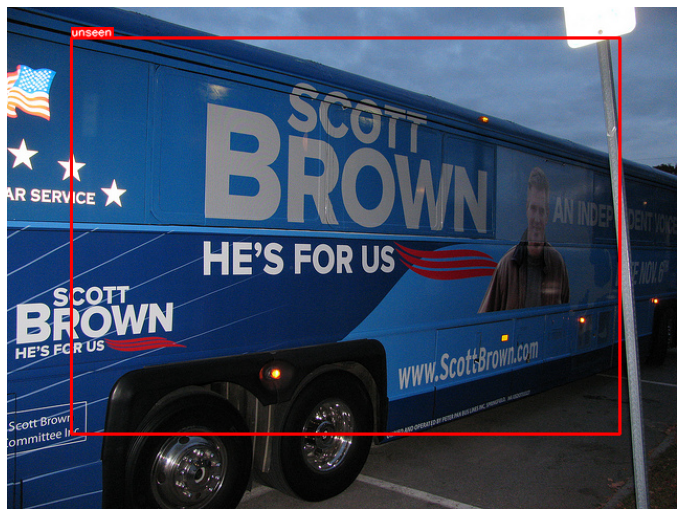

In [60]:
visualize(image, bboxes, category_ids, category_id_to_name)